<a href="https://colab.research.google.com/github/saicharan-r/Erav1/blob/main/S10/S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/saicharan-r/Erav1.git

Cloning into 'Erav1'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 202 (delta 68), reused 62 (delta 13), pack-reused 0
Receiving objects: 100% (202/202), 471.98 KiB | 6.65 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [2]:
%cd /content/Erav1/S10

/content/Erav1/S10


In [3]:
!pip install torch
!pip install torchvision
!pip install torch_lr_finder
from torchvision import datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_lr_finder import LRFinder

from dataset import train_loader, test_loader
from model import Net_s10, dropout_value
from train import train, test, train_losses, test_losses, train_acc, test_acc, lrs
from utils import get_incorrect_preds, plot_incorrect_preds, plot_sample_imgs

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


100%|██████████| 170498071/170498071 [00:03<00:00, 49208197.71it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
(1600000, 32, 3)
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


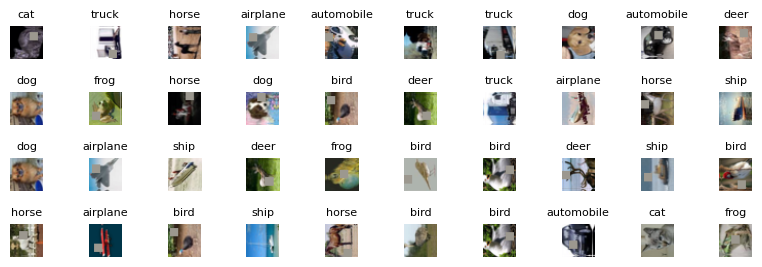

In [4]:
plot_sample_imgs(train_loader)

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_s10().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.38E-01


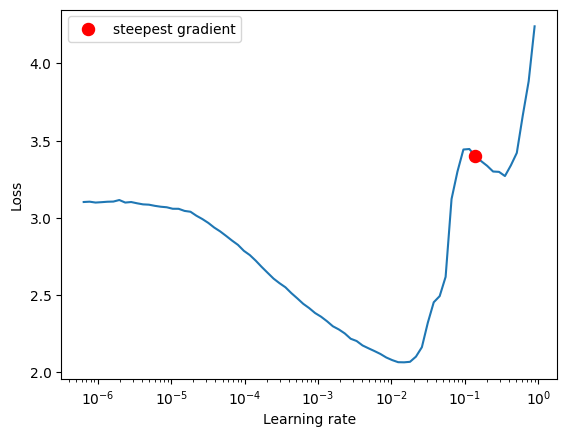

In [6]:
model =  Net_s10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [7]:
EPOCHS = 24
model =  Net_s10().to(device)
optimizer = optim.Adam(model.parameters(), lr=5.21E-04, weight_decay=1e-2)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr=5.21E-04,
                                          pct_start=0.2,
                                          epochs=EPOCHS,
                                          div_factor=100.0,
                                          final_div_factor=100.0,
                                          steps_per_epoch=len(train_loader))
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, scheduler, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.361345887184143 Batch_id=390 Accuracy=36.07: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]



Test set: Average loss: 1.2968, Accuracy: 5285/10000 (52.85%)

EPOCH: 2


Loss=0.7292974591255188 Batch_id=390 Accuracy=60.31: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]



Test set: Average loss: 0.9347, Accuracy: 6734/10000 (67.34%)

EPOCH: 3


Loss=0.8309510946273804 Batch_id=390 Accuracy=70.48: 100%|██████████| 391/391 [00:21<00:00, 17.87it/s]



Test set: Average loss: 0.7794, Accuracy: 7332/10000 (73.32%)

EPOCH: 4


Loss=0.9109892845153809 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]



Test set: Average loss: 0.7025, Accuracy: 7659/10000 (76.59%)

EPOCH: 5


Loss=0.659468948841095 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [00:22<00:00, 17.47it/s]



Test set: Average loss: 0.6773, Accuracy: 7673/10000 (76.73%)

EPOCH: 6


Loss=0.6433004140853882 Batch_id=390 Accuracy=80.57: 100%|██████████| 391/391 [00:22<00:00, 17.60it/s]



Test set: Average loss: 0.6565, Accuracy: 7730/10000 (77.30%)

EPOCH: 7


Loss=0.6659999489784241 Batch_id=390 Accuracy=81.89: 100%|██████████| 391/391 [00:22<00:00, 17.74it/s]



Test set: Average loss: 0.6253, Accuracy: 7936/10000 (79.36%)

EPOCH: 8


Loss=0.6160119771957397 Batch_id=390 Accuracy=82.68: 100%|██████████| 391/391 [00:21<00:00, 17.81it/s]



Test set: Average loss: 0.5250, Accuracy: 8260/10000 (82.60%)

EPOCH: 9


Loss=0.716676652431488 Batch_id=390 Accuracy=83.02: 100%|██████████| 391/391 [00:21<00:00, 17.90it/s]



Test set: Average loss: 0.7474, Accuracy: 7463/10000 (74.63%)

EPOCH: 10


Loss=0.44426432251930237 Batch_id=390 Accuracy=83.47: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s]



Test set: Average loss: 0.5809, Accuracy: 8075/10000 (80.75%)

EPOCH: 11


Loss=0.49023547768592834 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:22<00:00, 17.69it/s]



Test set: Average loss: 0.5886, Accuracy: 7963/10000 (79.63%)

EPOCH: 12


Loss=0.4898190498352051 Batch_id=390 Accuracy=84.75: 100%|██████████| 391/391 [00:22<00:00, 17.66it/s]



Test set: Average loss: 0.4960, Accuracy: 8391/10000 (83.91%)

EPOCH: 13


Loss=0.5233626961708069 Batch_id=390 Accuracy=85.75: 100%|██████████| 391/391 [00:22<00:00, 17.66it/s]



Test set: Average loss: 0.4685, Accuracy: 8479/10000 (84.79%)

EPOCH: 14


Loss=0.36640915274620056 Batch_id=390 Accuracy=86.54: 100%|██████████| 391/391 [00:21<00:00, 17.91it/s]



Test set: Average loss: 0.4110, Accuracy: 8635/10000 (86.35%)

EPOCH: 15


Loss=0.6466692686080933 Batch_id=390 Accuracy=87.71: 100%|██████████| 391/391 [00:21<00:00, 18.01it/s]



Test set: Average loss: 0.5098, Accuracy: 8237/10000 (82.37%)

EPOCH: 16


Loss=0.33250054717063904 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [00:22<00:00, 17.61it/s]



Test set: Average loss: 0.3913, Accuracy: 8690/10000 (86.90%)

EPOCH: 17


Loss=0.23347806930541992 Batch_id=390 Accuracy=90.33: 100%|██████████| 391/391 [00:22<00:00, 17.69it/s]



Test set: Average loss: 0.3423, Accuracy: 8851/10000 (88.51%)

EPOCH: 18


Loss=0.2702527344226837 Batch_id=390 Accuracy=91.29: 100%|██████████| 391/391 [00:22<00:00, 17.76it/s]



Test set: Average loss: 0.3042, Accuracy: 8982/10000 (89.82%)

EPOCH: 19


Loss=0.4557003974914551 Batch_id=390 Accuracy=92.76: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]



Test set: Average loss: 0.2845, Accuracy: 9052/10000 (90.52%)

EPOCH: 20


Loss=0.18400469422340393 Batch_id=390 Accuracy=94.08: 100%|██████████| 391/391 [00:21<00:00, 17.96it/s]



Test set: Average loss: 0.2570, Accuracy: 9151/10000 (91.51%)

EPOCH: 21


Loss=0.20283126831054688 Batch_id=390 Accuracy=95.36: 100%|██████████| 391/391 [00:21<00:00, 18.01it/s]



Test set: Average loss: 0.2379, Accuracy: 9215/10000 (92.15%)

EPOCH: 22


Loss=0.16381028294563293 Batch_id=390 Accuracy=96.19: 100%|██████████| 391/391 [00:22<00:00, 17.75it/s]



Test set: Average loss: 0.2273, Accuracy: 9236/10000 (92.36%)

EPOCH: 23


Loss=0.14648541808128357 Batch_id=390 Accuracy=96.85: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s]



Test set: Average loss: 0.2230, Accuracy: 9257/10000 (92.57%)

EPOCH: 24


Loss=0.13168373703956604 Batch_id=390 Accuracy=97.14: 100%|██████████| 391/391 [00:22<00:00, 17.73it/s]



Test set: Average loss: 0.2218, Accuracy: 9264/10000 (92.64%)



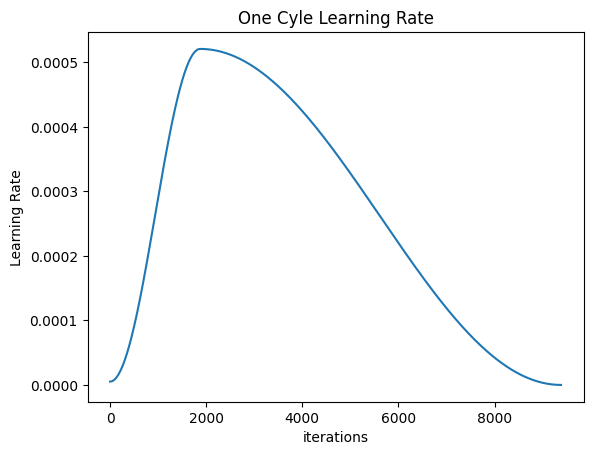

In [8]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(lrs)
plt.xlabel('iterations')
plt.ylabel('Learning Rate')

# displaying the title
plt.title("One Cyle Learning Rate")
plt.show()

Text(0.5, 1.0, 'Test Accuracy')

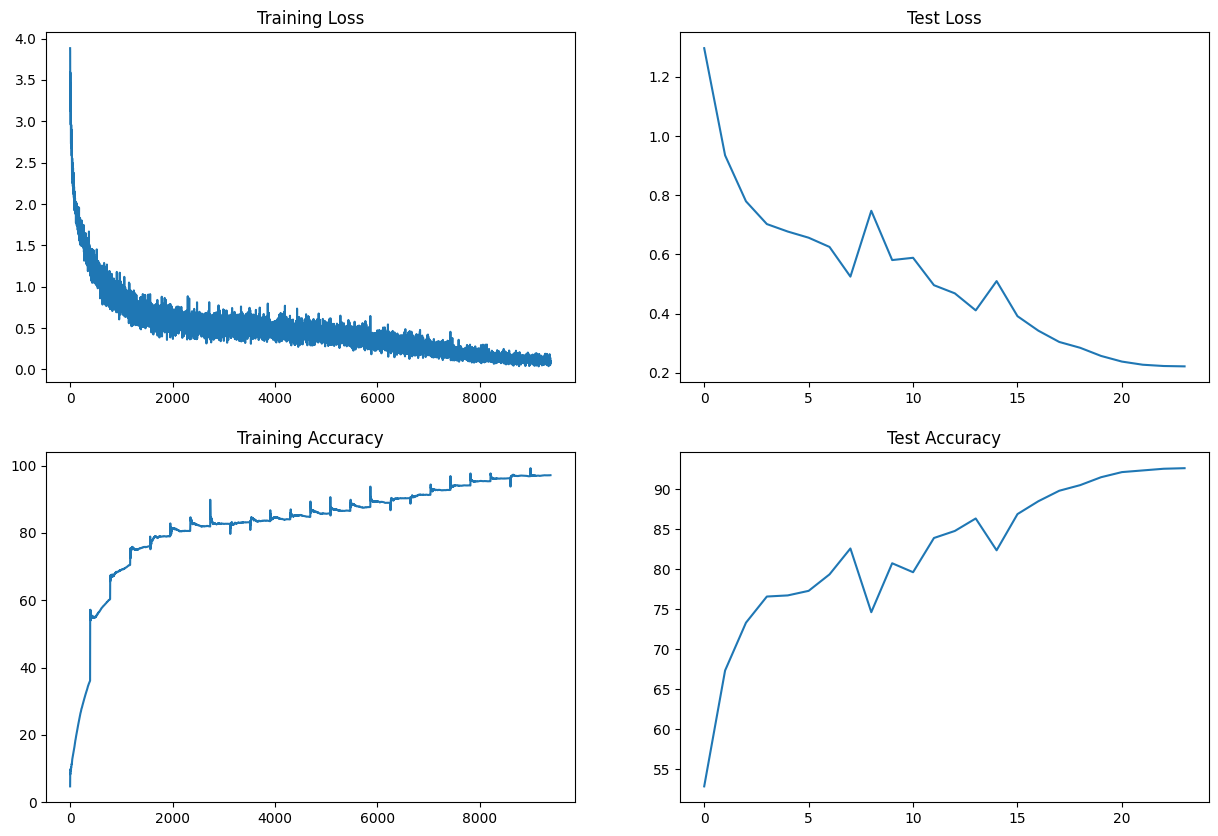

In [9]:
t = [t_items.item() for t_items in train_losses]
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

Classes in order Actual and Predicted


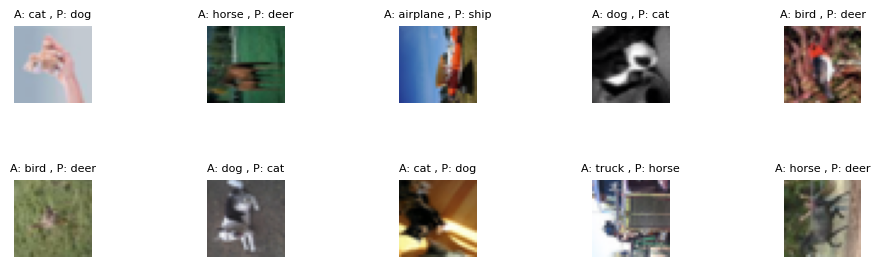

In [10]:
true_wrong, incorrect_examples, pred_wrong = get_incorrect_preds(model, test_loader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)